In [2]:
import sys
sys.path.append('..')
import dependencies
import soft_dependencies

Python Version 3.9.12 (main, Jun  1 2022, 06:36:29) 
[Clang 12.0.0 ]
Numpy Version 1.22.2
Scipy Version 1.7.3
Sklearn Version 1.0.2
Matplotlib Version 3.5.1
Pandas Version 1.4.2
Line Profiler Version 3.3.1
Memory Profiler Version 0.58.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=3, suppress=True)
%load_ext autoreload
%autoreload 2

In [4]:
from Scripts.experiments import create_precision_recall_curves

# scBiGLasso Easy

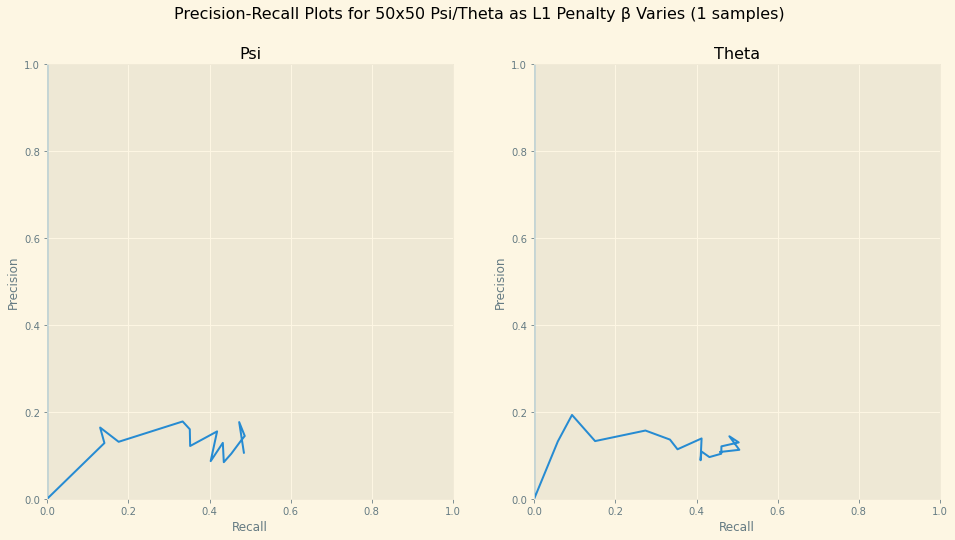

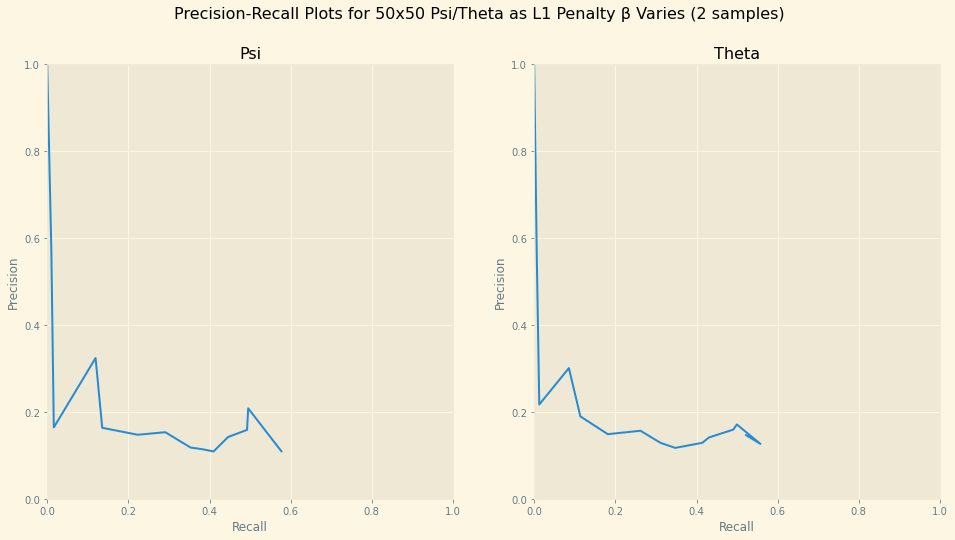

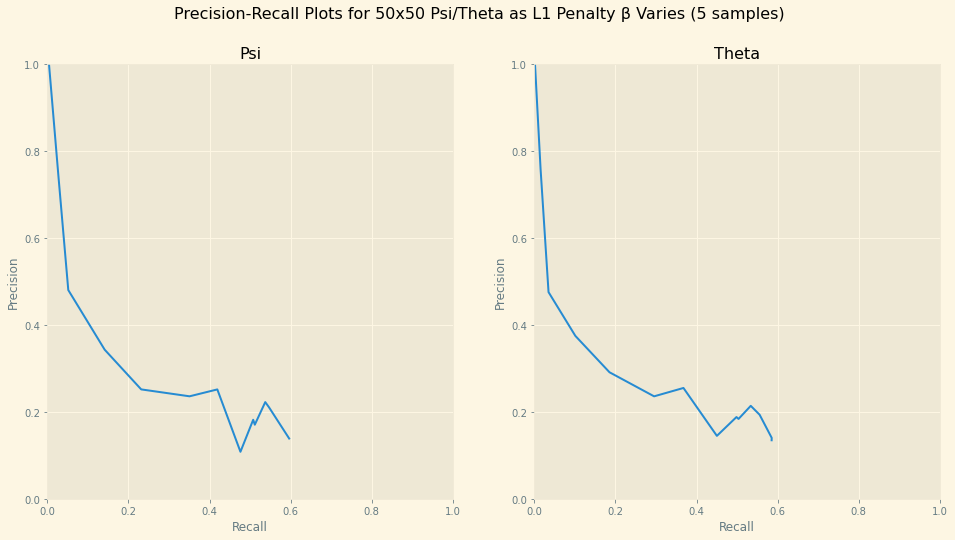

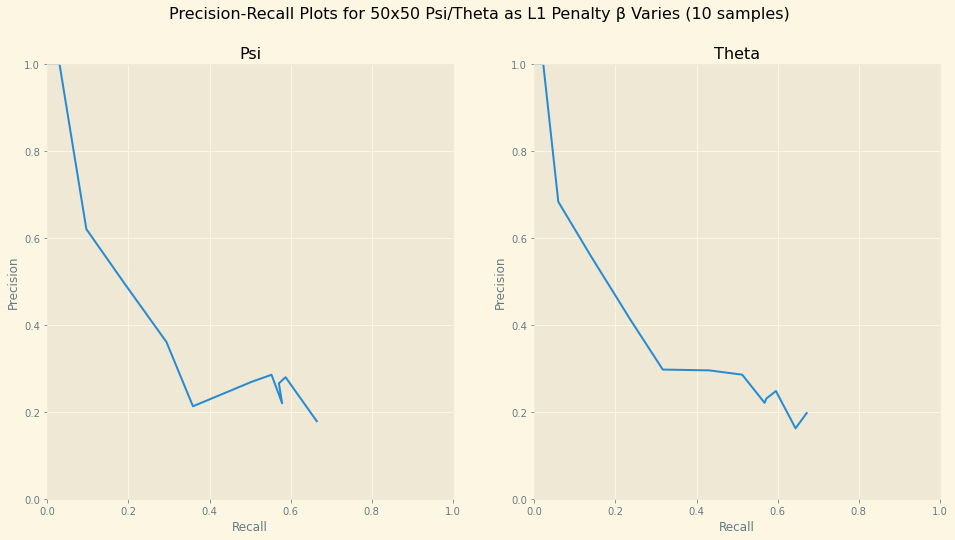

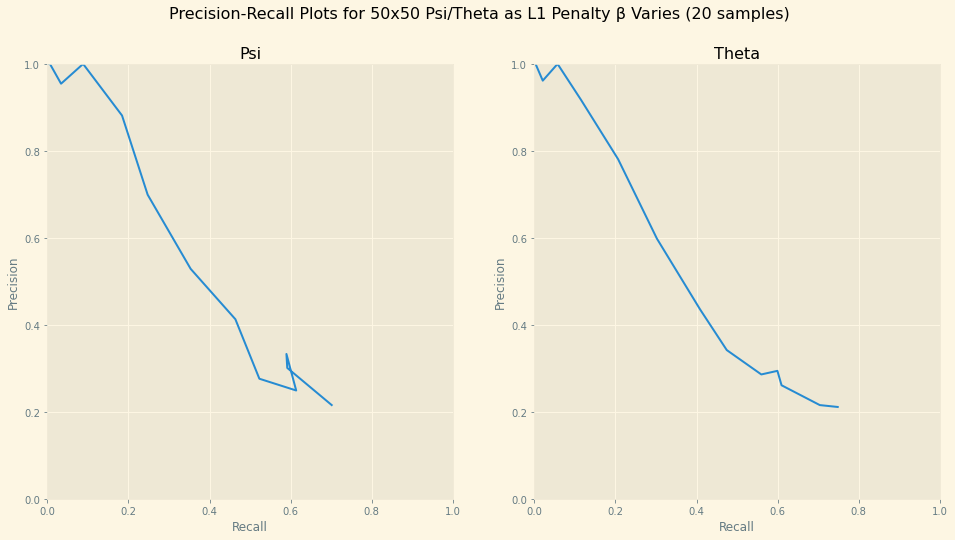

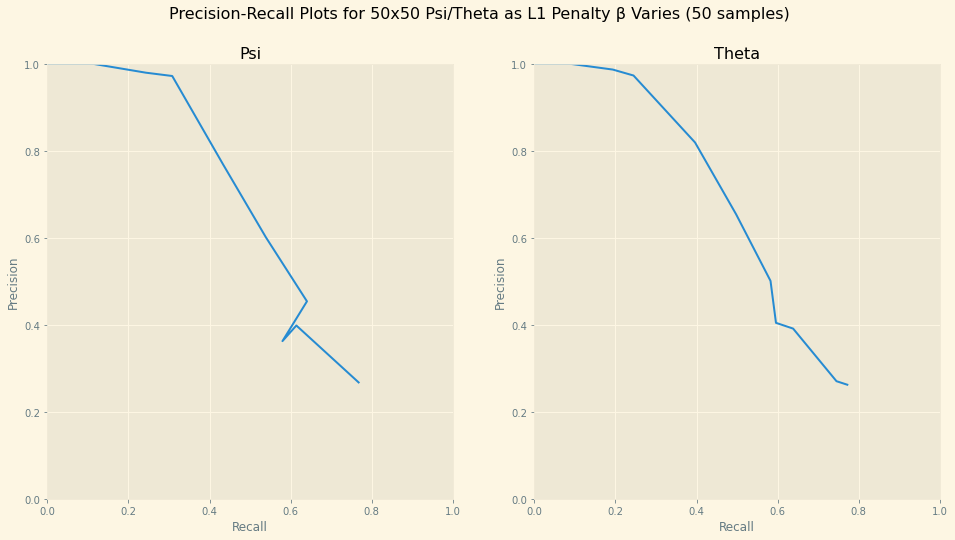

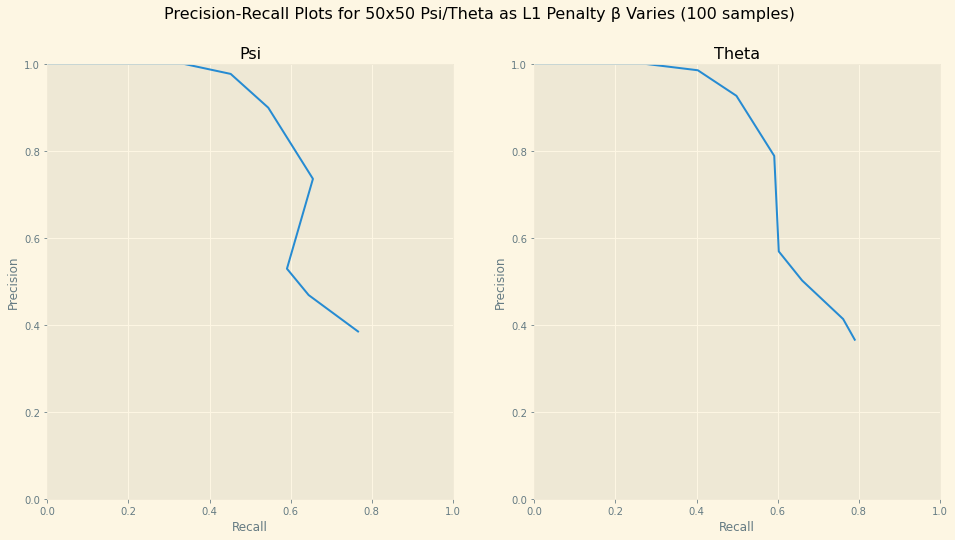

In [33]:
# How does choice of betas and matrix size affect results?
# on 'easy' data
# =================== for scBiGLasso ================
samples = [1, 2, 5, 10, 20, 50, 100]
betas = [
    10**np.arange(-1, 1, 0.1), # 50
    10**np.arange(-1, 1, 0.1),
    10**np.arange(-1, 1, 0.1),
    10**np.arange(-1, 1, 0.1),
    10**np.arange(-1, 1, 0.1),
    10**np.arange(-1, 1, 0.1),
    10**np.arange(-1, 1, 0.1)
]
vary_sizes_experiment = dict({})
for idx, m in enumerate(samples):
    fig, axs, dicts = create_precision_recall_curves(
        betas[idx],
        m,
        50,
        attempts=5, # Too slow for more attempts!
        indices_to_highlight=[],
        alg="scBiGLasso",
        df_scale=2
    )
    fig.savefig(f'../../Plots/Vary Samples - scBiGLasso - Easy/Precision-Recall-Vary-Samples-{m}')
    display(fig) # Force figure to display NOW (`fig.show()` does not do this)
    plt.close(fig) # Suppress double-displaying the figure

## anBiGLasso Easy

In [62]:
# How does choice of betas and matrix size affect results?
# on 'easy' data
# =================== for anBiGLasso ================
samples = [1, 2, 5, 10, 20, 50, 100]
betas = [
    10**np.arange(-4, 0, 0.1), # 50
    10**np.arange(-4, 0, 0.1),
    10**np.arange(-4, 0, 0.1),
    10**np.arange(-4, 0, 0.1),
    10**np.arange(-4, 0, 0.1),
    10**np.arange(-4, 0, 0.1),
    10**np.arange(-4, 0, 0.1)
]
vary_sizes_experiment = dict({})
for idx, m in enumerate(samples):
    fig, axs, dicts = create_precision_recall_curves(
        betas[idx],
        m,
        50,
        attempts=50,
        indices_to_highlight=[],
        alg="anBiGLasso_cov",
        df_scale=2,
        B_approx_iters=10,
        cm_mode='Nonzero'
    )
    fig.savefig(
        f'../../Plots/Vary Samples - anBiGLasso - Easy/Precision-Recall-Vary-Samples-{m}'
    )
    display(fig) # Force figure to display NOW (`fig.show()` does not do this)
    plt.close(fig) # Suppress double-displaying the figure

[0.025 0.033 0.038 0.04  0.043 0.049 0.033 0.036 0.054 0.062 0.044 0.043
 0.079 0.085 0.113 0.135 0.083 0.152 0.166 0.18  0.198 0.262 0.245 0.329
 0.298 0.281 0.324 0.393 0.406 0.43  0.459 0.531 0.647 0.643 0.73  0.771
 0.804 0.838 0.888 0.984 1.044 1.097 1.154 1.192 1.283 1.436 1.514 1.718
 1.831 1.949]
[40.123 30.474 26.632 25.211 23.347 20.495 30.698 27.969 18.477 16.144
 22.764 22.993 12.634 11.763  8.887  7.404 12.006  6.597  6.026  5.548
  5.038  3.82   4.089  3.041  3.36   3.553  3.084  2.546  2.46   2.327
  2.181  1.882  1.545  1.556  1.37   1.296  1.244  1.193  1.126  1.016
  0.958  0.912  0.866  0.839  0.779  0.696  0.661  0.582  0.546  0.513]
[0.032 0.046 0.042 0.024 0.035 0.044 0.03  0.048 0.058 0.063 0.08  0.062
 0.061 0.064 0.113 0.074 0.152 0.15  0.136 0.176 0.201 0.216 0.259 0.281
 0.312 0.344 0.329 0.369 0.383 0.435 0.488 0.517 0.625 0.668 0.729 0.773
 0.782 0.844 0.909 0.987 1.029 1.092 1.148 1.195 1.296 1.444 1.527 1.718
 1.826 1.954]
[31.416 21.732 23.786 40.839 28.

Traceback (most recent call last):
  File "/Users/baileyandrew/opt/anaconda3/envs/my_default_environment/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3397, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/k0/qy74mdx10qs493700g929k5h0000gn/T/ipykernel_21857/118715122.py", line 16, in <cell line: 15>
    fig, axs, dicts = create_precision_recall_curves(
  File "/Users/baileyandrew/Desktop/Python Notebooks.nosync/Research/scBiGLasso Implementation/Python Implementation/Notebooks/../Scripts/experiments.py", line 178, in create_precision_recall_curves
    Psi_cms, Theta_cms = get_cms_for_betas(
  File "/Users/baileyandrew/Desktop/Python Notebooks.nosync/Research/scBiGLasso Implementation/Python Implementation/Notebooks/../Scripts/experiments.py", line 64, in get_cms_for_betas
    Psi, Theta = anBiGLasso_cov(
  File "/Users/baileyandrew/Desktop/Python Notebooks.nosync/Research/scBiGLasso Implementation/Python Implementation/Noteboo

# EiGLasso Easy

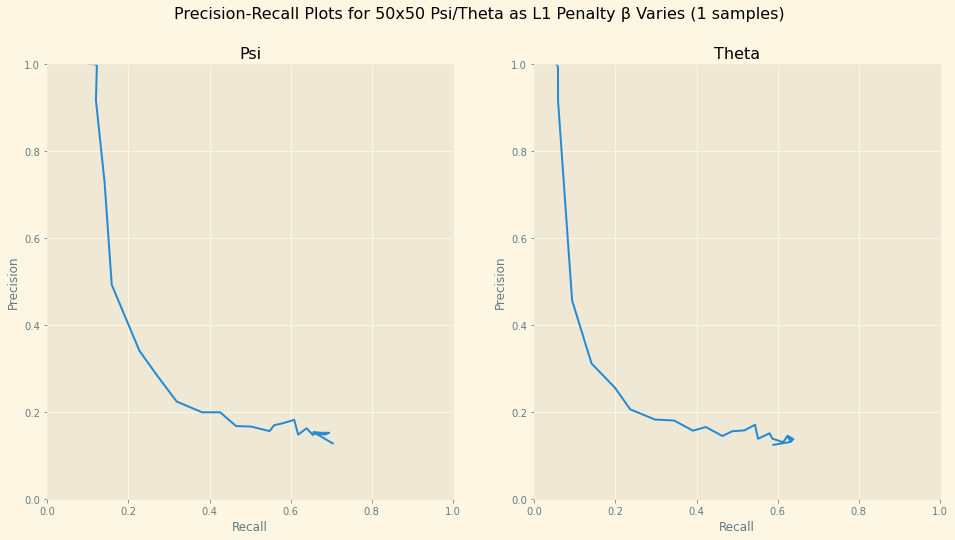

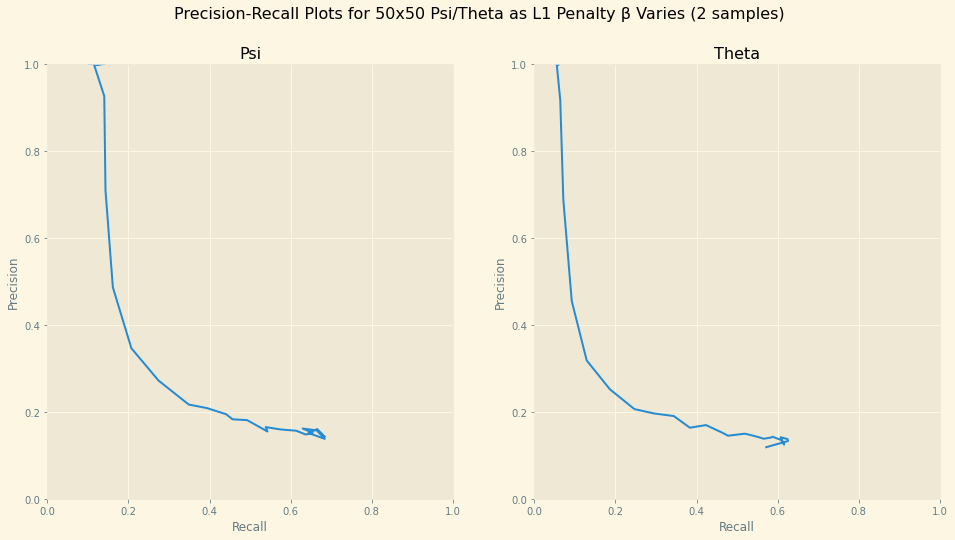

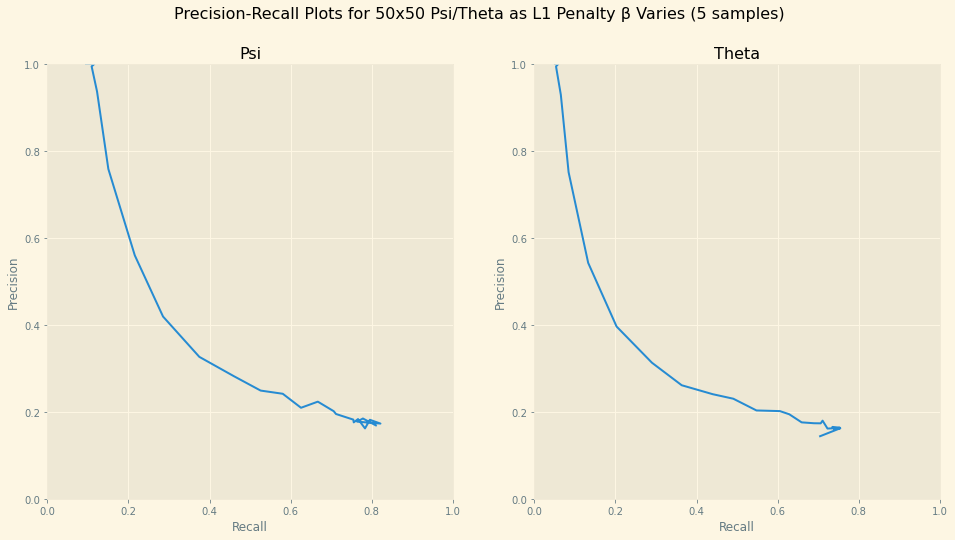

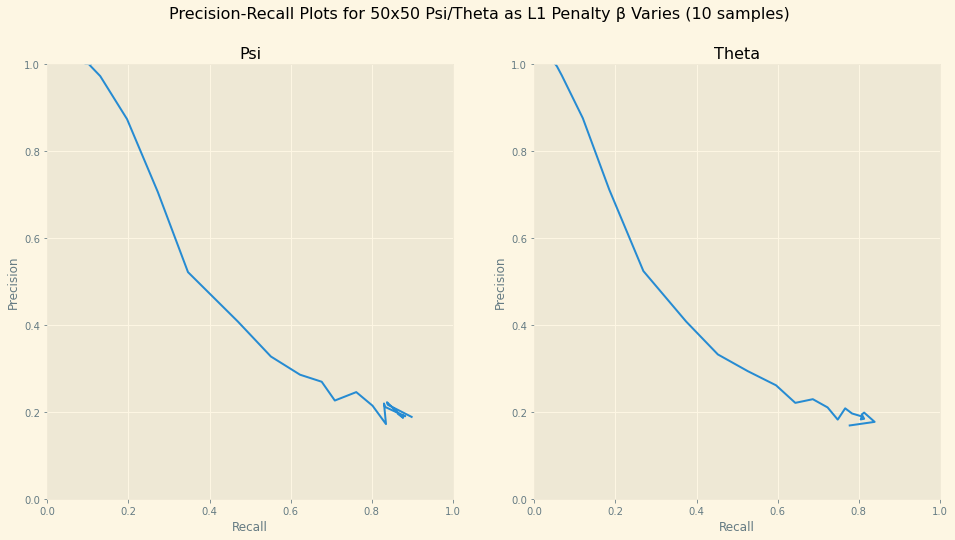

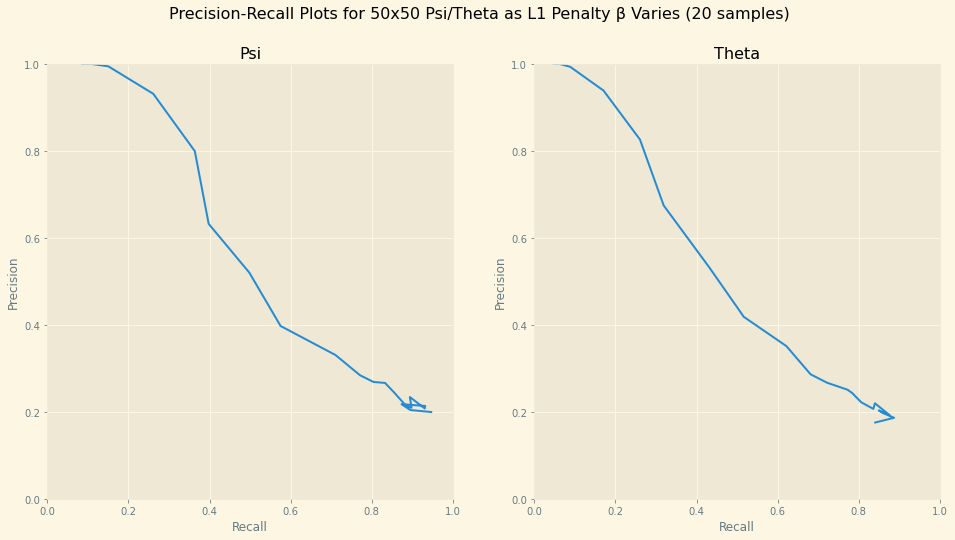

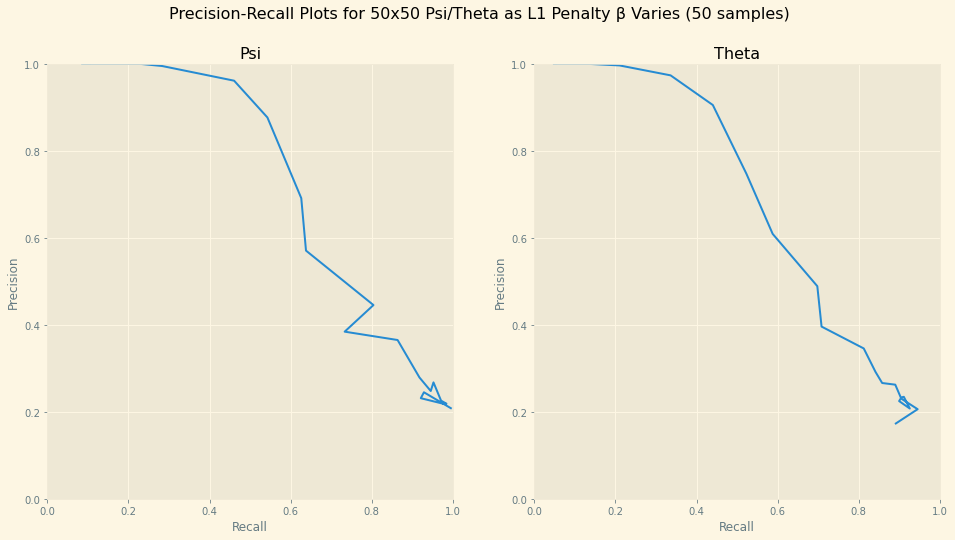

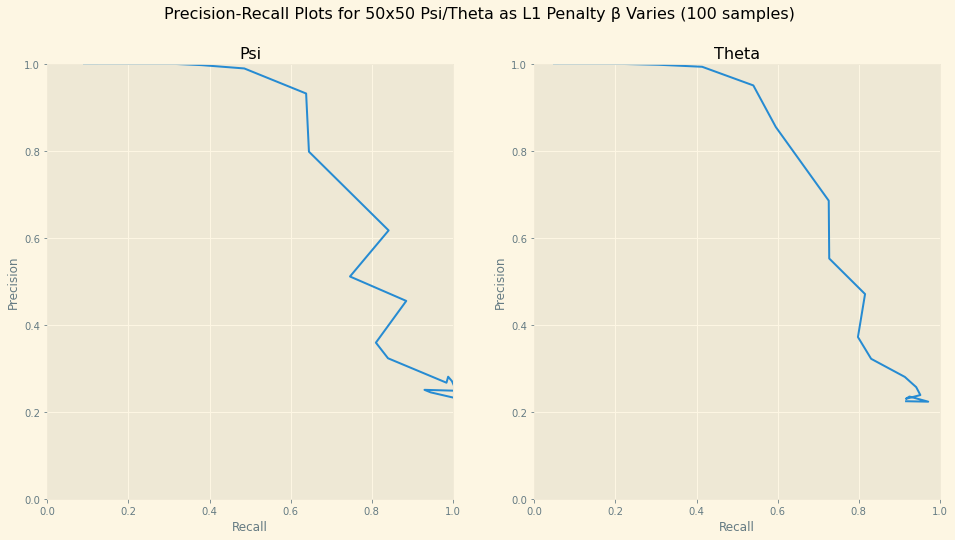

In [48]:
# How does choice of betas and matrix size affect results?
# on 'easy' data
# =================== for EiGLasso ================
samples = [1, 2, 5, 10, 20, 50, 100]
betas = [
    10**np.arange(-3, 0, 0.1), # 50
    10**np.arange(-3, 0, 0.1),
    10**np.arange(-3, 0, 0.1),
    10**np.arange(-3, 0, 0.1),
    10**np.arange(-3, 0, 0.1),
    10**np.arange(-3, 0, 0.1),
    10**np.arange(-3, 0, 0.1)
]
vary_sizes_experiment = dict({})
for idx, m in enumerate(samples):
    fig, axs, dicts = create_precision_recall_curves(
        betas[idx],
        m,
        50,
        attempts=25,
        indices_to_highlight=[],
        alg="EiGLasso",
        df_scale=2
    )
    fig.savefig(
        f'../../Plots/Vary Samples - EiGLasso - Easy/Precision-Recall-Vary-Samples-{m}'
    )
    display(fig) # Force figure to display NOW (`fig.show()` does not do this)
    plt.close(fig) # Suppress double-displaying the figure